# Unicode in Python 3

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [2]:
from addutils import css_notebook
css_notebook()

## 1 The World and Unicode

There are five unavoidable facts to take in consideration:

**Computers are built on Bytes**

It's not possible to send Unicode to someone: the only thing possible is to send bytes. You don't send text: you send bytes.

To send text to people what we decided to do, because bytes are meaningless, is to assign meaning to bytes. The most known convenction id the *ASCII* code that takes 95 graphic symbols and maps it to bytes values. Other codings assigned more values: *ISO 8859-1= added 96 more characters and *Windows-1252* added 27 more characters.

**256 Symbols are not enough for the world to communicate text**

There a lot of languages in the world and it's not possible to ask everyone to speak English!

To deal with more than 256 symbols the first idea was to make new single-bytes codes. Thea was infeasible because many different codes where made at the same time, not to mention alphabets with more than 256 symbols. Next idea was dealing with two-bytes codes but this generated problems anyway.

We end-up by making *Unicode*. Unicode is foundamentally a giant catalogue of symbols assigned to integers called *code points* that are written with "U+" HEX Digit, example `U+03B1` is the greek letter alpha. The structure of Unicode allows 1.1M characters of which 110K has been assigned so far, so we used nearly 10% of the available space and we covered all the world languages.

What we have to do is to figure out how to map this 1.1M integers in bytes. This is done by encodings: encodings are ways to map integer to bytes and vice-versa.

There is a number of different encodings (UTF-8, UTF-7, UTF-16, UTF-32, UCS-2, UCS-4) but the king of all the encodings is *UTF-8*.

**UTF-8** is the most important encoding you must know about: is variable lenght (from one to four bytes) and ASCII character are still represented by one byte. This means that ASCII strings are valid UTF-8 strings.

**UTF-8** is a multibyte encoding able to encode the whole Unicode charset. An encoded character takes between 1 and 4 bytes. UTF-8 encoding supports longer byte sequences, up to 6 bytes, but the biggest code point of Unicode 6.0 (U+10FFFF) only takes 4 bytes.

It is possible to be sure that a byte string is encoded to UTF-8, because UTF-8 adds markers to each byte. For the first byte of a multibyte character, bit 7 and bit 6 are set `(0b11xxxxxx)`; the next bytes have bit 7 set and bit 6 unset `(0b10xxxxxx)`.

* **UCS-2** and **UCS-4** encodings encode each code point to exactly one unit.
* **UTF-16** and **UTF-32** encodings use, respectivelly, 16 and 32 bits units.
* **UTF-7** encoding is similar to the **UTF-8** encoding, except that it uses 7 bits units instead of 8 bits units. It is used for example in emails with server which are not “8 bits clean”.

## 2 Encoding and decoding in Python 3.x

In Python 2.x there were two distinct datatypes: one for storing *bytes* which is called `str` and one for storing *Unicode code points*, called `unicode`.

In Python 3 there are still two datatypes: one for strings (sequence of code points) and one for bytes (sequence of bytes)

In [3]:
my_string = u'This is a string: ' + '\u2020\u212f\u2716t'
print('{:15s} : {:s}'.format(str(type(my_string)), my_string))

my_bytes = b'Hello world'
print('{:15s} : {:}'.format(str(type(my_bytes)), my_bytes))

<class 'str'>   : This is a string: †ℯ✖t
<class 'bytes'> : b'Hello world'


## 3 Reading files

In Python 3 the data you get from files depends on how you open it: there is a "text" mode and a "binary" mode for opening files. If you open with the default 'r' mode you get an unicode string, if instead you use a 'rb' mode, you get a byte string.

Option: in the following code you can define a specific decoder with

    open(path, 'r', encoding='utf-8').read()
    
Option: use the system decoder with:

    open(path, 'r', encoding=locale.getpreferredencoding()).read()

In [4]:
import os.path
path = os.path.join(os.path.curdir, 'tmp', 'my_utf8_example.txt')
with open(path, 'w', encoding='utf-8') as fid:
    fid.write(my_string)

In [5]:
open(path, 'r').read()
#import locale
#open(path, 'r', encoding=locale.getpreferredencoding()).read()
#open(path, 'r', encoding='utf-8').read()

'This is a string: †ℯ✖t'

In [6]:
open(path, 'rb').read()

b'This is a string: \xe2\x80\xa0\xe2\x84\xaf\xe2\x9c\x96t'

*Remember: you can't infer encoding from bytes: someone has to tell you the encoding:*

In [7]:
path = os.path.join(os.path.curdir, 'tmp', 'my_unknow_encoder.txt')
with open(path, 'wb') as fid:
    b = 'THIS IS AN ENCODING TEST'.encode('cp1252')
    fid.write(b)

In [8]:
# Check https://docs.python.org/2/library/codecs.html for a full Codec list

decoders = ['ascii', 'latin_1', 'cp1252', 'cp1253', 'iso2022_jp_2',
            'UTF-8', 'UTF-7', 'UTF-16', 'UTF-32', 'UCS-2', 'UCS-4']
for decoder in decoders:
    try:
        print('{:>15s}  Recognized: "{:s}"'.format(decoder, open(path,
                                                 'r', encoding=decoder).read()))
    except:
        print('{:>15s}  Not recognized'.format(decoder))


          ascii  Recognized: "THIS IS AN ENCODING TEST"
        latin_1  Recognized: "THIS IS AN ENCODING TEST"
         cp1252  Recognized: "THIS IS AN ENCODING TEST"
         cp1253  Recognized: "THIS IS AN ENCODING TEST"
   iso2022_jp_2  Recognized: "THIS IS AN ENCODING TEST"
          UTF-8  Recognized: "THIS IS AN ENCODING TEST"
          UTF-7  Recognized: "THIS IS AN ENCODING TEST"
         UTF-16  Not recognized
         UTF-32  Not recognized
          UCS-2  Not recognized
          UCS-4  Not recognized


## 4 Bytes Outside, Unicode Inside

The most safe way of dealing with unicode is to convert to unicode as soon as possible (when we get the raw data) and to convert back while sending the data out of our program.

Data ca be encoded and decoded in two ways:

* `'something'.encode('utf-8')`
* `bytes('something', 'utf-8')`

Neither is better than the other, they do exactly the same thing. However, using `.encode()` and `.decode()` is the more common way to do it. It is also compatible with Python 2.

Encoding and decoding can be useful to go from a coding system to another:

In [9]:
s1 = '♈♉♊♋♌♍♎♏♐♑♒♓'
b1 = s1.encode('utf-7') # Convert from unicode to bytes
print(b1)

b'+JkgmSSZKJksmTCZNJk4mTyZQJlEmUiZT-'


In [10]:
s1

'♈♉♊♋♌♍♎♏♐♑♒♓'

In [11]:
b1.decode('utf-7') # Convert from bytes to unicode with the Right decoder

'♈♉♊♋♌♍♎♏♐♑♒♓'

In [12]:
b1.decode('utf-8')  # Convert from bytes to unicode with the Wrong decoder

'+JkgmSSZKJksmTCZNJk4mTyZQJlEmUiZT-'

Just have fun and TEST with text generators: the best way to check if your code works well is to feed it with unicode strings and not just with ASCII strings. If you want to find a Text Generator just type "fancy text generators" on Google.

In [13]:
start = 9500
for i in range(start, start+1000):
    print(chr(i), end='')

├┝┞┟┠┡┢┣┤┥┦┧┨┩┪┫┬┭┮┯┰┱┲┳┴┵┶┷┸┹┺┻┼┽┾┿╀╁╂╃╄╅╆╇╈╉╊╋╌╍╎╏═║╒╓╔╕╖╗╘╙╚╛╜╝╞╟╠╡╢╣╤╥╦╧╨╩╪╫╬╭╮╯╰╱╲╳╴╵╶╷╸╹╺╻╼╽╾╿▀▁▂▃▄▅▆▇█▉▊▋▌▍▎▏▐░▒▓▔▕▖▗▘▙▚▛▜▝▞▟■□▢▣▤▥▦▧▨▩▪▫▬▭▮▯▰▱▲△▴▵▶▷▸▹►▻▼▽▾▿◀◁◂◃◄◅◆◇◈◉◊○◌◍◎●◐◑◒◓◔◕◖◗◘◙◚◛◜◝◞◟◠◡◢◣◤◥◦◧◨◩◪◫◬◭◮◯◰◱◲◳◴◵◶◷◸◹◺◻◼◽◾◿☀☁☂☃☄★☆☇☈☉☊☋☌☍☎☏☐☑☒☓☔☕☖☗☘☙☚☛☜☝☞☟☠☡☢☣☤☥☦☧☨☩☪☫☬☭☮☯☰☱☲☳☴☵☶☷☸☹☺☻☼☽☾☿♀♁♂♃♄♅♆♇♈♉♊♋♌♍♎♏♐♑♒♓♔♕♖♗♘♙♚♛♜♝♞♟♠♡♢♣♤♥♦♧♨♩♪♫♬♭♮♯♰♱♲♳♴♵♶♷♸♹♺♻♼♽♾♿⚀⚁⚂⚃⚄⚅⚆⚇⚈⚉⚊⚋⚌⚍⚎⚏⚐⚑⚒⚓⚔⚕⚖⚗⚘⚙⚚⚛⚜⚝⚞⚟⚠⚡⚢⚣⚤⚥⚦⚧⚨⚩⚪⚫⚬⚭⚮⚯⚰⚱⚲⚳⚴⚵⚶⚷⚸⚹⚺⚻⚼⚽⚾⚿⛀⛁⛂⛃⛄⛅⛆⛇⛈⛉⛊⛋⛌⛍⛎⛏⛐⛑⛒⛓⛔⛕⛖⛗⛘⛙⛚⛛⛜⛝⛞⛟⛠⛡⛢⛣⛤⛥⛦⛧⛨⛩⛪⛫⛬⛭⛮⛯⛰⛱⛲⛳⛴⛵⛶⛷⛸⛹⛺⛻⛼⛽⛾⛿✀✁✂✃✄✅✆✇✈✉✊✋✌✍✎✏✐✑✒✓✔✕✖✗✘✙✚✛✜✝✞✟✠✡✢✣✤✥✦✧✨✩✪✫✬✭✮✯✰✱✲✳✴✵✶✷✸✹✺✻✼✽✾✿❀❁❂❃❄❅❆❇❈❉❊❋❌❍❎❏❐❑❒❓❔❕❖❗❘❙❚❛❜❝❞❟❠❡❢❣❤❥❦❧❨❩❪❫❬❭❮❯❰❱❲❳❴❵❶❷❸❹❺❻❼❽❾❿➀➁➂➃➄➅➆➇➈➉➊➋➌➍➎➏➐➑➒➓➔➕➖➗➘➙➚➛➜➝➞➟➠➡➢➣➤➥➦➧➨➩➪➫➬➭➮➯➰➱➲➳➴➵➶➷➸➹➺➻➼➽➾➿⟀⟁⟂⟃⟄⟅⟆⟇⟈⟉⟊⟋⟌⟍⟎⟏⟐⟑⟒⟓⟔⟕⟖⟗⟘⟙⟚⟛⟜⟝⟞⟟⟠⟡⟢⟣⟤⟥⟦⟧⟨⟩⟪⟫⟬⟭⟮⟯⟰⟱⟲⟳⟴⟵⟶⟷⟸⟹⟺⟻⟼⟽⟾⟿⠀⠁⠂⠃⠄⠅⠆⠇⠈⠉⠊⠋⠌⠍⠎⠏⠐⠑⠒⠓⠔⠕⠖⠗⠘⠙⠚⠛⠜⠝⠞⠟⠠⠡⠢⠣⠤⠥⠦⠧⠨⠩⠪⠫⠬⠭⠮⠯⠰⠱⠲⠳⠴⠵⠶⠷⠸⠹⠺⠻⠼⠽⠾⠿⡀⡁⡂⡃⡄⡅⡆⡇⡈⡉⡊⡋⡌⡍⡎⡏⡐⡑⡒⡓⡔⡕⡖⡗⡘⡙⡚⡛⡜⡝⡞⡟⡠⡡⡢⡣⡤⡥⡦⡧⡨⡩⡪⡫⡬⡭⡮⡯⡰⡱⡲⡳⡴⡵⡶⡷⡸⡹⡺⡻⡼⡽⡾⡿⢀⢁⢂⢃⢄⢅⢆⢇⢈⢉⢊⢋⢌⢍⢎⢏⢐⢑⢒⢓⢔⢕⢖⢗⢘⢙⢚⢛⢜⢝⢞⢟⢠⢡⢢⢣⢤⢥⢦⢧⢨⢩⢪⢫⢬⢭⢮⢯⢰⢱⢲⢳⢴⢵⢶⢷⢸⢹⢺⢻⢼⢽⢾⢿⣀⣁⣂⣃⣄⣅⣆⣇⣈⣉⣊⣋⣌⣍⣎⣏⣐⣑⣒⣓⣔⣕⣖⣗⣘⣙⣚⣛⣜⣝⣞⣟⣠⣡⣢⣣⣤⣥⣦⣧⣨⣩⣪⣫⣬⣭⣮⣯⣰⣱⣲⣳⣴⣵⣶⣷⣸⣹⣺⣻⣼⣽⣾⣿⤀⤁⤂⤃

For more information check this video from PyCon2012:

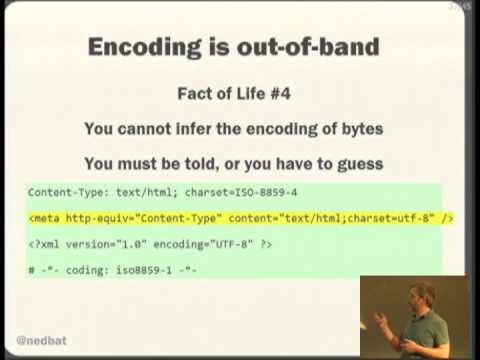

In [14]:
# Video credit: Ned Batchelder
from IPython.display import YouTubeVideo
YouTubeVideo('sgHbC6udIqc', width=640, height=480)

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.